In [1]:
#linear regression - only for regression
#logistic regression - a classification problem, 
#model evlaution- confusion matrix, roc, auc

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df =pd.read_csv("Cardio_vascular.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
#here above target is the dependent varaible - to find whether person has heart disease or not
#it is a heart disease dats set 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
The dataset used in this article is the Cleveland Heart Disease dataset. There are 14 
columns in the dataset,

which are described below.

Age, in years
Sex, 1 = male; 0 = female
cp: chest pain type – Value 0: typical angina – Value 1: atypical angina – 
            Value 2: non-anginal pain – Value 3: asymptomatic
                    
trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    
chol: serum cholestoral in mg/d 
fbs: (fasting blood sugar > 120 mg/dl) 1 = true; 0 =false
    
restecg: resting electrocardiographic results – 
    Value 0: normal – 
    Value 1: having ST-T wave abnormality (T wave inversions and/or 
    ST elevation or depression of >0.05 mV) – 
    Value 2: showing probable or definite left ventricu lar hypertrophy by Estes’ criteria
        
thalach: maximum heart rate achieved during stress TEST
    
exang: exercise induced angina, 1 = yes; 0 = no
    
oldpeak = ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment – Value 0: upsloping – 
        Value 1: flat – Value 2: downsloping
                
ca: number of major vessels (0-4) colored by flourosopy
    
thal: thalassmia, 0 = null; 1=normal; 2 = fixed defect; 3 = reversible defect
    
condition (target) : 0 = no disease, 1 = disease

In [6]:
#no null/missing vlaue and no categorical vlaue

In [7]:
# if target 0 means no disease
#if target 1 means disease


In [8]:
df.rename(columns={"sex":"gender","cp":"rest_cp","trestbps":"rest_bp","chol":"cholesterol","fbs":"fast_bloodsugar",
                   "restecg":"rest_ecg","thalach":"stress_HR","exang":"Exercise_cp","oldpeak":"STdepression_Exerc",
                   "slope":"STpeak_exerc","ca":"coloured_vessels","thal":"thalassmia","target":"heart_disease"},inplace=True)

In [9]:
df.head()

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
#now target is changed to heart disease

In [11]:
df.describe()

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia,heart_disease
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.436098,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.141463,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.071551,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,22.990115,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
df.heart_disease.value_counts()


1    526
0    499
Name: heart_disease, dtype: int64

In [13]:
df.heart_disease.value_counts(normalize=True)


1    0.513171
0    0.486829
Name: heart_disease, dtype: float64

In [14]:
# Please do work on visualization work using Matplotlib and Seaborn

In [15]:
#lets split into dependent and independent variable

In [16]:
x = df.drop(['heart_disease'], axis=1)
y = df['heart_disease']

In [17]:
#axis =1 specifies that it shud searach in columns

In [18]:
#remvong of outliers depends on stakeholders, if ur stake holders allow, u can remove dataset

In [19]:
#scalng is required for logistic regression

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [21]:
scale= MinMaxScaler()
x_scaled = scale.fit_transform(x)
x_scaled

array([[0.47916667, 1.        , 0.        , ..., 1.        , 0.5       ,
        1.        ],
       [0.5       , 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.85416667, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.375     , 1.        , 0.        , ..., 0.5       , 0.25      ,
        0.66666667],
       [0.4375    , 0.        , 0.        , ..., 1.        , 0.        ,
        0.66666667],
       [0.52083333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ]])

In [22]:
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)

In [23]:
x_scaled.head()

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia
0,0.479167,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000
1,0.500000,1.0,0.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000
2,0.854167,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000
3,0.666667,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000
4,0.687500,0.0,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667


In [24]:
#corr

In [25]:
x_scaled.corr(method="spearman")

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia
age,1.000000,-0.105859,-0.092161,0.280046,0.203287,0.110856,-0.149565,-0.383572,0.077391,0.264582,-0.180474,0.339660,0.088443
gender,-0.105859,1.000000,-0.053450,-0.071923,-0.152997,0.027200,-0.044169,-0.046480,0.139157,0.090896,-0.020843,0.113834,0.241115
rest_cp,-0.092161,-0.053450,1.000000,0.025526,-0.092239,0.073738,0.066715,0.335338,-0.427933,-0.195285,0.169307,-0.217002,-0.212186
rest_bp,0.280046,-0.071923,0.025526,1.000000,0.127010,0.152272,-0.137273,-0.027979,0.043791,0.146722,-0.081828,0.091323,0.058995
cholesterol,0.203287,-0.152997,-0.092239,0.127010,1.000000,0.034139,-0.163354,-0.053430,0.088895,0.057102,-0.026660,0.114584,0.084941
fast_bloodsugar,0.110856,0.027200,0.073738,0.152272,0.034139,1.000000,-0.101709,-0.016838,0.049261,0.032542,-0.048340,0.138197,-0.013372
rest_ecg,-0.149565,-0.044169,0.066715,-0.137273,-0.163354,-0.101709,1.000000,0.092661,-0.073428,-0.075213,0.109506,-0.108580,-0.017285
stress_HR,-0.383572,-0.046480,0.335338,-0.027979,-0.053430,-0.016838,0.092661,1.000000,-0.403849,-0.438630,0.443005,-0.253116,-0.158123
Exercise_cp,0.077391,0.139157,-0.427933,0.043791,0.088895,0.049261,-0.073428,-0.403849,1.000000,0.322149,-0.282593,0.158985,0.240512
STdepression_Exerc,0.264582,0.090896,-0.195285,0.146722,0.057102,0.032542,-0.075213,-0.438630,0.322149,1.000000,-0.594413,0.230183,0.253489


In [26]:
#corr doesnt change for sccaled and non-scaled data

In [27]:
#here with increase in age, chances of heart_disease decreases(as value is -0.24, negative corelated)
#but with increase in rest_cp(chest pain), chances of heart_disease increase(as +ve coorellatin)

In [28]:
#as heatmap dosent have value > 0.9, we will not drop any values

In [29]:
#split data in trainig and testing

In [30]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test  = train_test_split(x_scaled, y, test_size=0.2, random_state=100, stratify=y)

In [ ]:
#This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provide
#we use stratify is used if data set is unbalanced, we assign target variable to strtify
#but in curret data set for person having heart disease and no is around 50%
#and stratify we use only in classification problem not regression 

In [36]:
x_train

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia
198,0.645833,0.0,0.666667,0.075472,0.438356,0.0,0.5,0.679389,0.0,0.000000,1.0,0.25,0.666667
918,0.625000,1.0,1.000000,0.377358,0.178082,0.0,0.5,0.694656,0.0,0.129032,1.0,0.50,0.666667
77,0.708333,1.0,0.000000,0.433962,0.139269,0.0,0.0,0.557252,1.0,0.645161,1.0,0.50,1.000000
32,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000
82,0.354167,1.0,0.666667,0.528302,0.239726,0.0,0.5,0.580153,0.0,0.580645,0.5,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,0.500000,1.0,0.000000,0.273585,0.356164,0.0,0.5,0.183206,1.0,0.322581,0.5,0.50,1.000000
905,0.729167,1.0,0.000000,0.245283,0.273973,0.0,0.0,0.190840,1.0,0.354839,0.0,0.25,0.666667
961,0.604167,0.0,0.000000,0.056604,0.278539,0.0,0.0,0.389313,0.0,0.161290,0.5,0.00,0.666667
465,0.187500,1.0,0.666667,0.415094,0.111872,0.0,0.5,0.778626,0.0,0.000000,1.0,1.00,0.666667


In [38]:
x_train.shape

(820, 13)

In [39]:
from sklearn.linear_model import LogisticRegression

In [42]:
lr=LogisticRegression()

In [43]:
lr.fit(x_train, y_train) #when we say fit, we say model to learn from trained data and now we can tesst it

LogisticRegression()

In [44]:
y_predict=lr.predict(x_test)

In [45]:
y_predict

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1])

In [ ]:
#classfication model evaluation

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
#here y-predict is testing data output

In [51]:
#accuracy
#we can calculrate training accuracy
y_train_predict = lr.predict(x_train)
print("training accuracy ",accuracy_score(y_train, y_train_predict))

training accuracy  0.8536585365853658


In [52]:
#testing accuarcy
print("testing accuracy ",accuracy_score(y_test, y_predict))

testing accuracy  0.8390243902439024


In [ ]:
#83% accuracy of testing data

In [53]:
#confusion matric
cm = confusion_matrix(y_test, y_predict)

In [54]:
cm

array([[76, 24],
       [ 9, 96]])

Text(50.722222222222214, 0.5, 'actual')

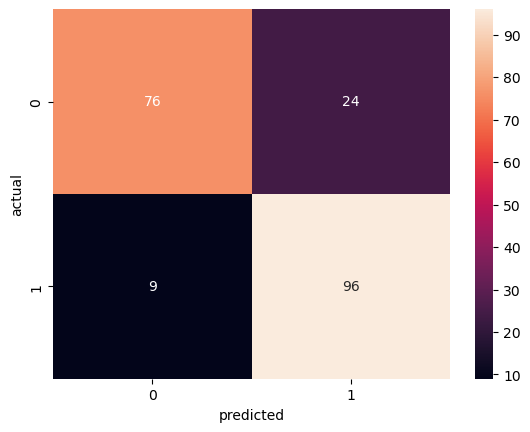

In [56]:
#visulization of cm
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')


In [ ]:
#out of total predictions, data, 9 are false negative, 24 are false positve

In [58]:
#classificaiton report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       100
           1       0.80      0.91      0.85       105

    accuracy                           0.84       205
   macro avg       0.85      0.84      0.84       205
weighted avg       0.85      0.84      0.84       205



In [ ]:
#evaluation of model classification
cm
precison
recall
fl score
sensitivity
roc auc 
accuracy will not be important

In [ ]:
#importance of scaling - what happens if we dont scale 

In [70]:
x_train1, x_test1, y_train1, y_test1  = train_test_split(x, y, test_size=0.2, random_state=100, stratify=y)

In [71]:
lr=LogisticRegression()

In [72]:
lr.fit(x_train1, y_train1) #when we say fit, we say model to learn from trained data and now we can tesst it

LogisticRegression()

In [73]:
y_test_predict1= lr.predict(x_test1)

In [74]:
accuracy_score( y_test1, y_test_predict1)

0.8341463414634146

In [ ]:
#it is less than scaled data accuracy
#after doing scaling accuracy will improve